# Network Creation

In [ ]:
install.packages('statnet')

## Adjacency matrix

In [1]:
adj<-as.matrix(read.table(('../grey_adjacency.tsv'), sep="\t",
                             header=T, row.names=1, quote="\""))

In [2]:
head(adj)

,addison,adele,altman,amelia,arizona,ava,avery,bailey,ben,burton,⋯,pierce,preston,reed,sloan,steve,susan.grey,thatch.grey,torres,tucker,yang
addison,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
adele,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
altman,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,1,0,0,0,0,0,0
amelia,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
arizona,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
ava,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
library(statnet)

In [5]:
grey_adj_net <- network(adj, directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

In [6]:
grey_adj_net

 Network attributes:
  vertices = 44 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 46 
    missing edges= 0 
    non-missing edges= 46 

 Vertex attribute names: 
    vertex.names 

No edge attributes

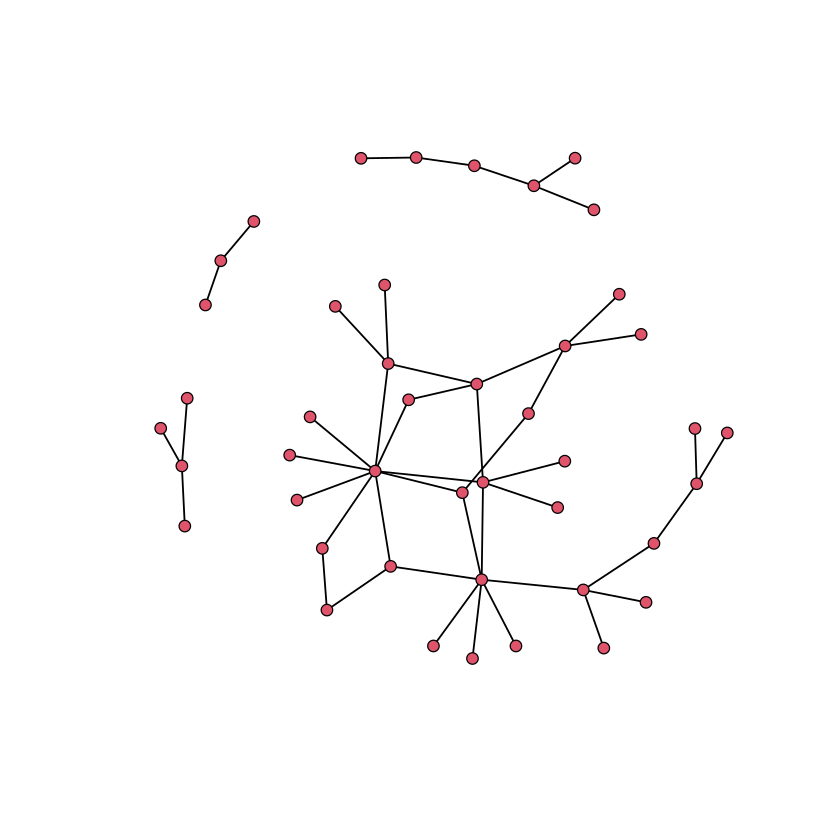

In [7]:
plot(grey_adj_net)

## Edge lists

Another way to representing a network is an edge list. Unlike an adjacency matrix an edge list assumes that there   
is no relationship between any nodes unless previously specified. Therefore the list just consists of two columns   
listing the source and target of any given edge (note that in undirected networks source and target are just  
meaningless labels because an edge always flows both ways).

In [8]:
el <- read.table('../grey_edgelist.tsv', sep="\t", header=T, quote="\"",
                  stringsAsFactors=F, strip.white=T, as.is=T)

In [9]:
head(el)

,V1,V2
,<int>,<int>
1,15,1
2,22,1
3,38,1
4,12,2
5,10,3
6,33,3


In [10]:
grey_el_net <- network(el, directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

In [11]:
grey_el_net

 Network attributes:
  vertices = 44 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 46 
    missing edges= 0 
    non-missing edges= 46 

 Vertex attribute names: 
    vertex.names 

No edge attributes

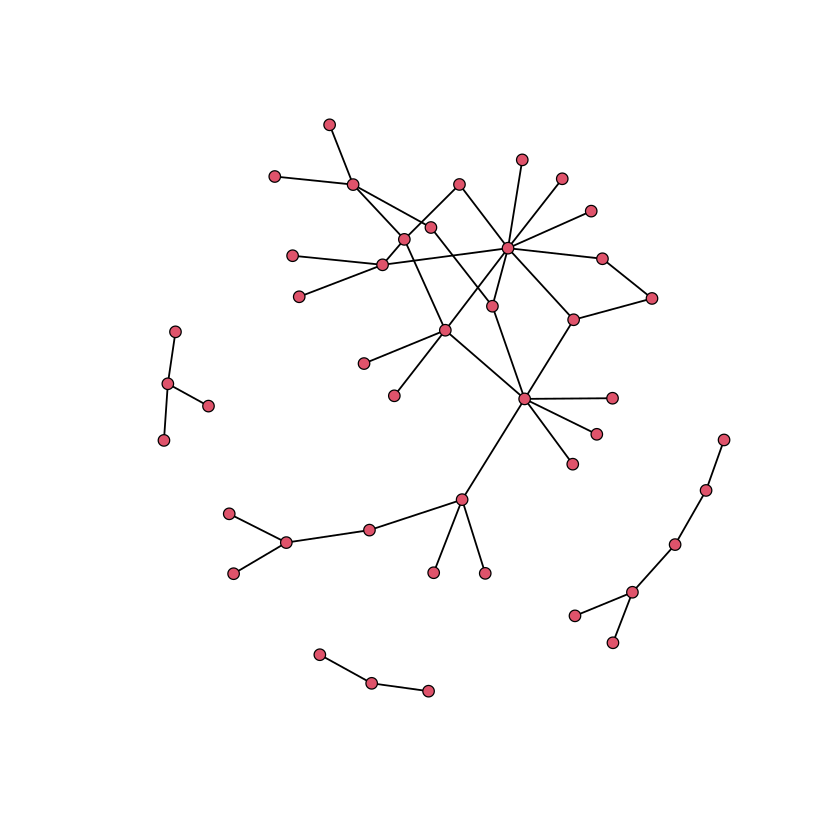

In [12]:
plot(grey_el_net)

## Node lists

In [13]:
nl <- read.table('../grey_nodes.tsv', sep="\t", header=T, quote="\"",
                    stringsAsFactors=F, strip.white=T, as.is=T)

In [14]:
head(nl)

,name,sex,race,birthyear,position,season,sign
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,addison,F,White,1967,Attending,1,Libra
2,adele,F,Black,1949,Non-Staff,2,Leo
3,altman,F,White,1969,Attending,6,Pisces
4,amelia,F,White,1981,Attending,7,Libra
5,arizona,F,White,1976,Attending,5,Leo
6,ava,F,White,1975,Non-Staff,3,Gemini


In [15]:
grey_nl_net <- network(adj, vertex.attr=nl, vertex.attrnames=colnames(nl),
                  directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

In [16]:
grey_nl_net

 Network attributes:
  vertices = 44 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 46 
    missing edges= 0 
    non-missing edges= 46 

 Vertex attribute names: 
    birthyear name position race season sex sign vertex.names 

No edge attributes

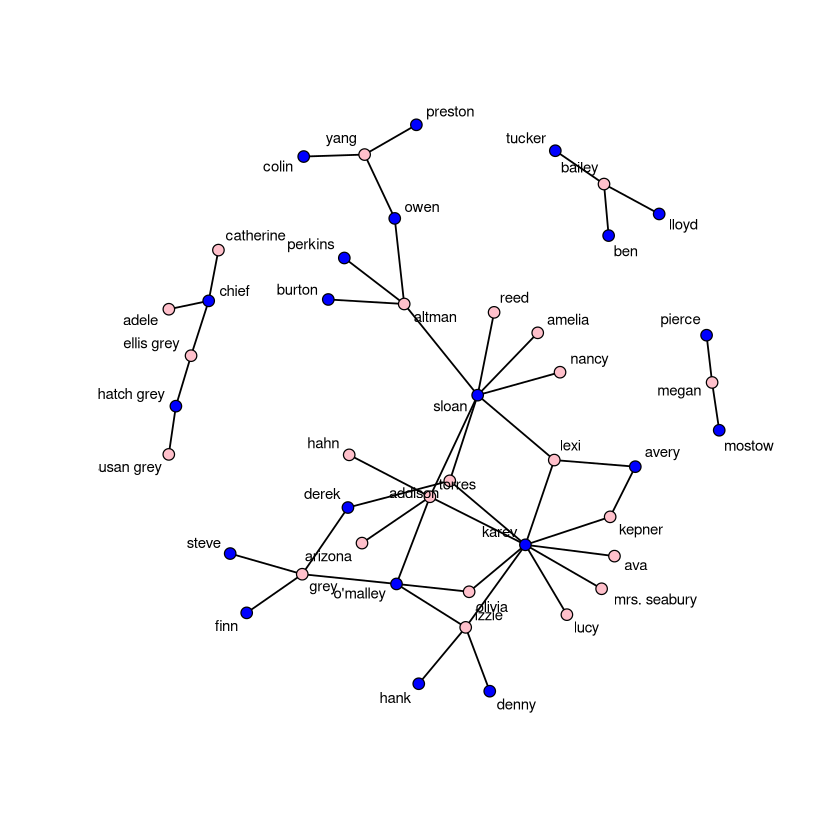

In [17]:
plot(grey_nl_net, vertex.col=c("blue","pink")[1+(get.vertex.attribute(grey_nl_net, "sex")=="F")],
     label=get.vertex.attribute(grey_nl_net, "name"), label.cex=.75)

## Queries

In [18]:
is.network(grey_nl_net)

[1] TRUE

In [19]:
is.bipartite(grey_nl_net)

[1] FALSE

In [20]:
is.directed(grey_nl_net) 

[1] FALSE

In [21]:
has.loops(grey_nl_net)

[1] FALSE

In [22]:
network.size(grey_nl_net)

[1] 44

In [23]:
network.edgecount(grey_nl_net)

[1] 46

## Random graphs

In [24]:
r_net <- network(rgraph(44, m=1, mode='digraph', tprob=0.025))

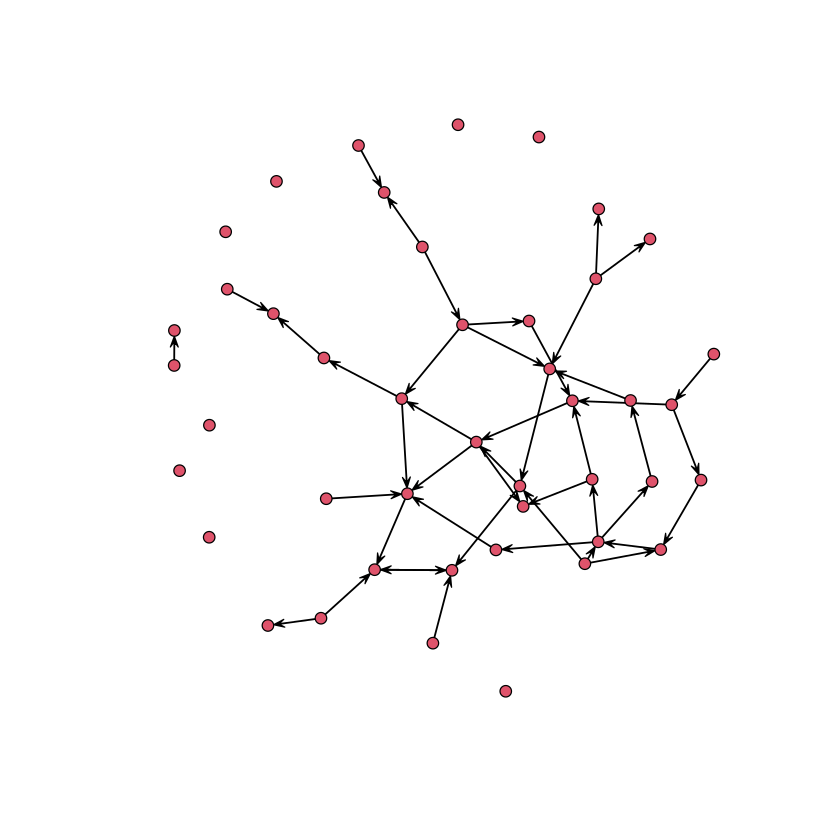

In [25]:
plot(r_net)